In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Exploratory Data Analysis

In [ ]:
train_df = pd.read_csv('../data/train.csv')
train_df.head(5)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [5]:
# Check for Missing Values
train_df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [6]:
# Check for duplication
train_df.duplicated().sum()

0

In [10]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None'
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        

In [11]:
train_df = train_df.drop(columns=['Employee ID'],axis=1)

In [12]:
train_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,59598.0,38.565875,12.079673,18.0,28.0,39.0,49.0,59.0
Years at Company,59598.0,15.753901,11.245981,1.0,7.0,13.0,23.0,51.0
Monthly Income,59598.0,7302.397983,2151.457423,1316.0,5658.0,7354.0,8880.0,16149.0
Number of Promotions,59598.0,0.832578,0.994991,0.0,0.0,1.0,2.0,4.0
Distance from Home,59598.0,50.007651,28.466459,1.0,25.0,50.0,75.0,99.0
Number of Dependents,59598.0,1.648075,1.555689,0.0,0.0,1.0,3.0,6.0
Company Tenure,59598.0,55.758415,25.411090,2.0,36.0,56.0,76.0,128.0


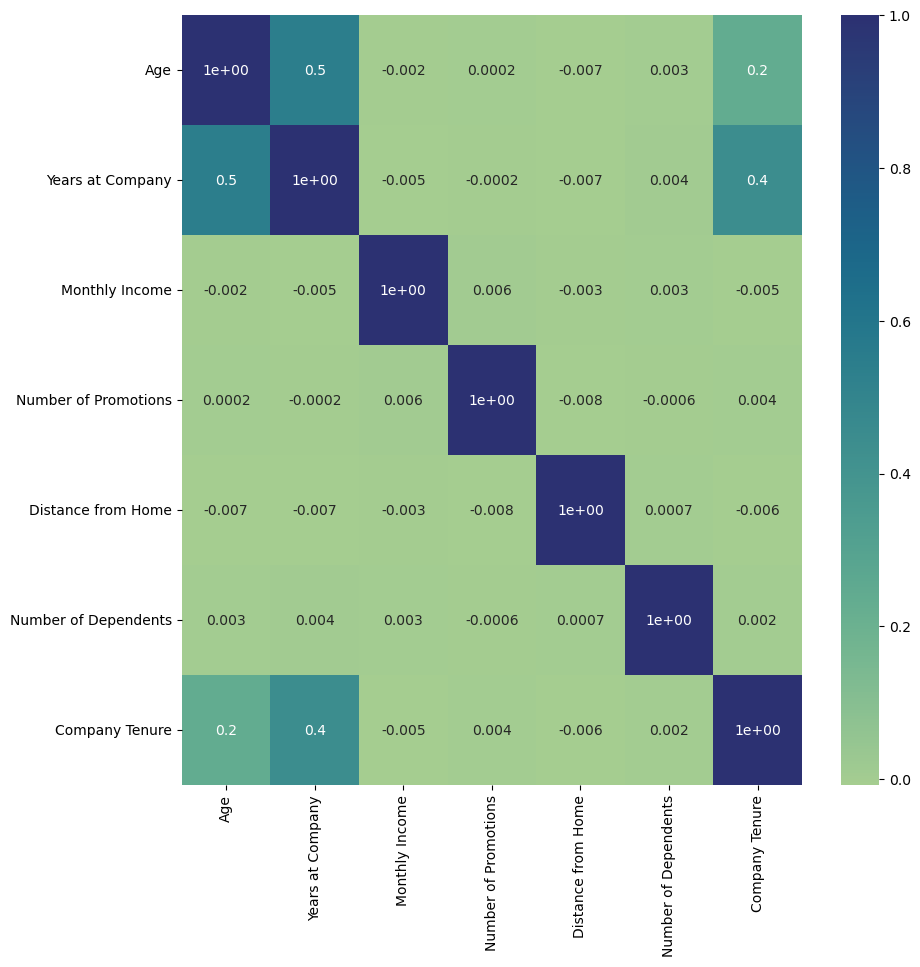

In [13]:
# Correlation
corr = train_df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.1', cmap="crest")
plt.show()

In [14]:
# Select numeric columns
num_cols=train_df.select_dtypes(exclude='object').columns
len(num_cols)

7

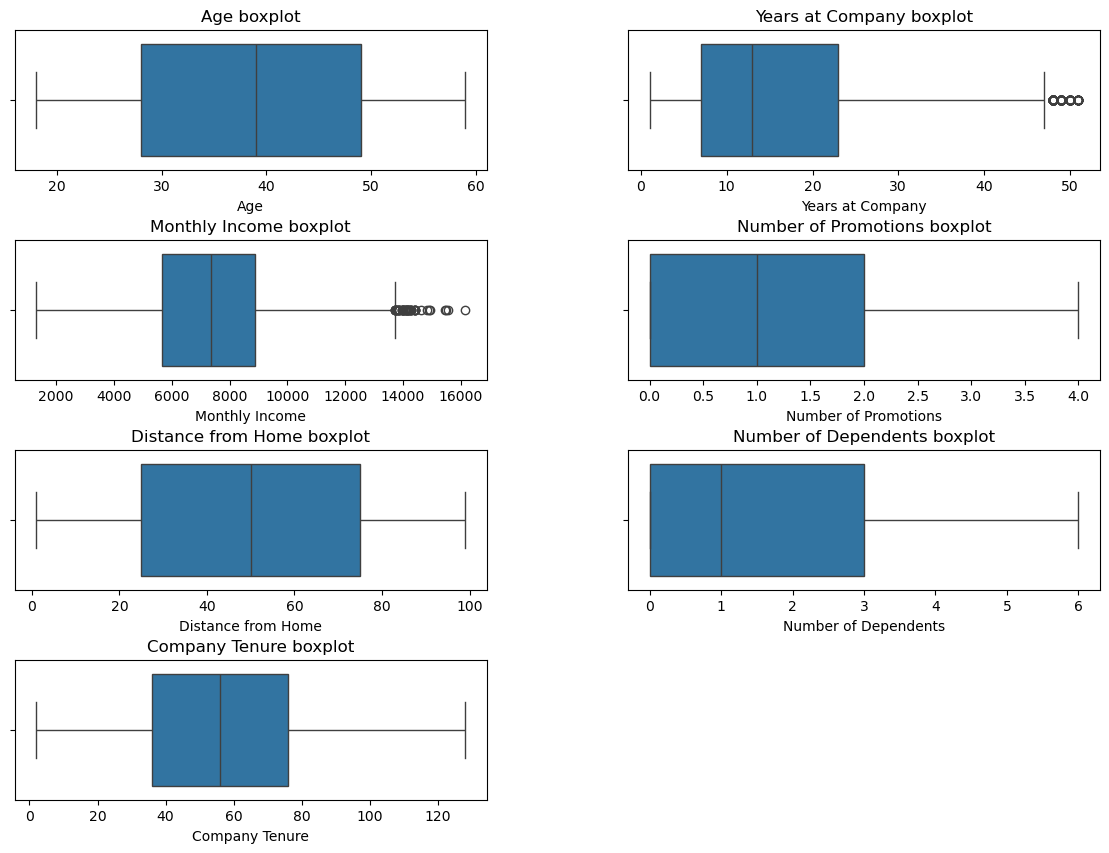

In [15]:
# Check for outlier
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(train_df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [16]:
# Remove outliers
for col in num_cols[1:3]:
    Q1 = np.quantile(train_df[col], .25)
    Q3 = np.quantile(train_df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = train_df[train_df[col] > upper][col].values
    lower_outliers = train_df[train_df[col] < lower][col].values    
    train_df[col].replace(upper_outliers, upper, inplace=True)
    train_df[col].replace(lower_outliers, lower, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16580\2612781529.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].replace(upper_outliers, upper, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16580\2612781529.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

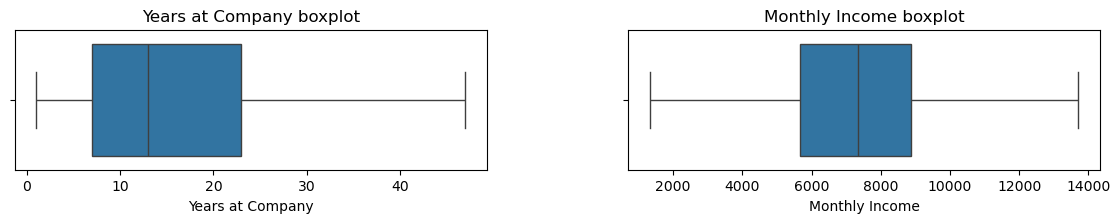

In [18]:
# Check
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols[1:3]):
    plt.subplot(4, 2, i+1)
    sns.boxplot(train_df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

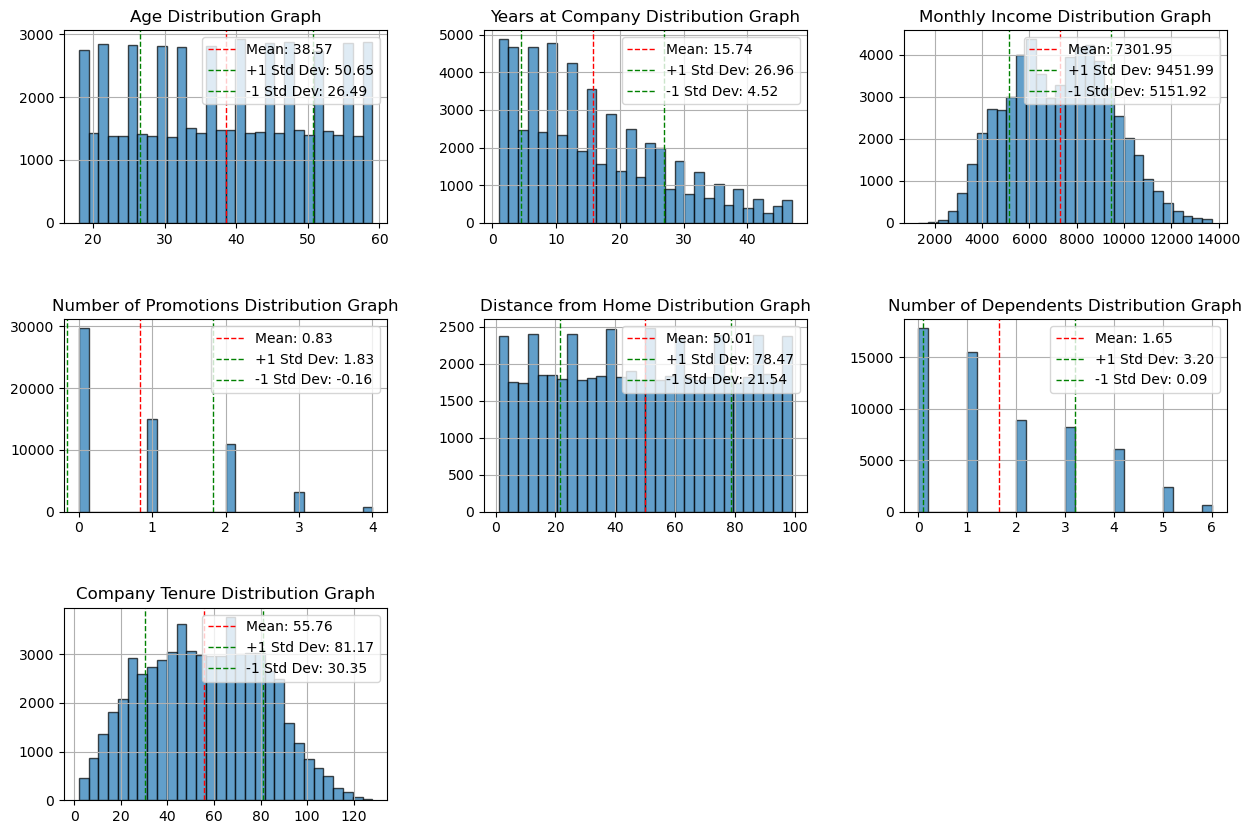

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(train_df[col], edgecolor="black", alpha=0.7, bins=30)
    
    mean = train_df[col].mean()
    std_dev = train_df[col].std()
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean + std_dev:.2f}')
    plt.axvline(mean - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean - std_dev:.2f}')
    
    plt.title(f"{col} Distribution Graph")
    plt.legend()
    plt.grid(True)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

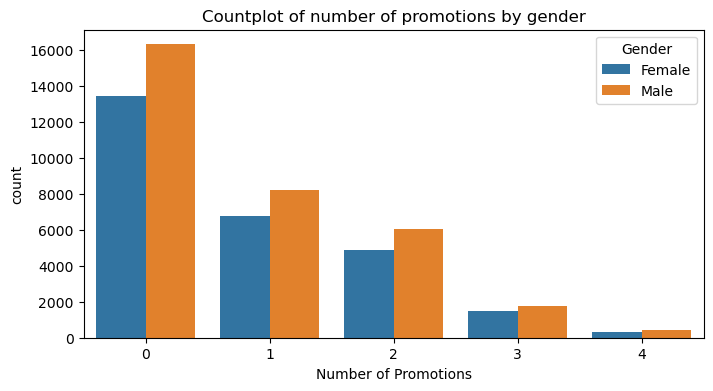

In [20]:
plt.figure(figsize=(8,4))
plt.title("Countplot of number of promotions by gender")
sns.countplot(train_df, x='Number of Promotions', hue='Gender')
plt.show()

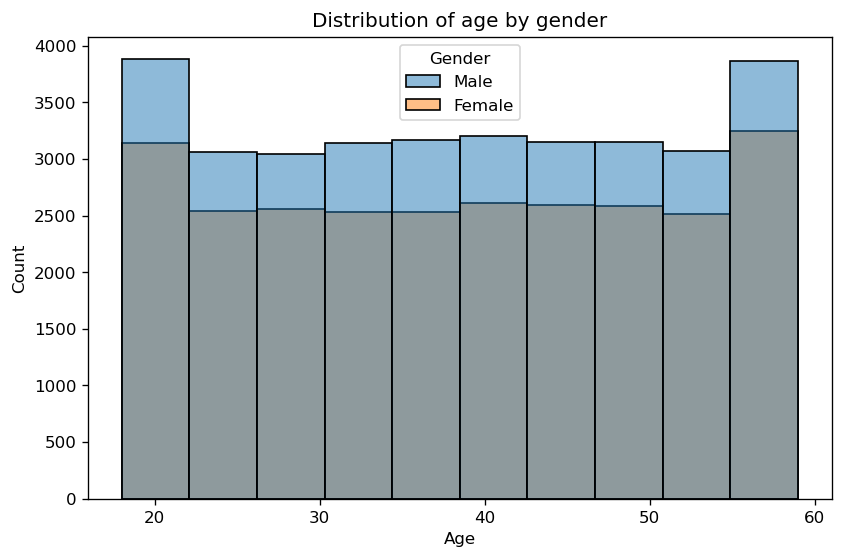

In [21]:
plt.figure(figsize=(8, 5), dpi=120)
plt.title("Distribution of age by gender")
sns.histplot(train_df, x='Age', hue='Gender', bins=10)
plt.show()

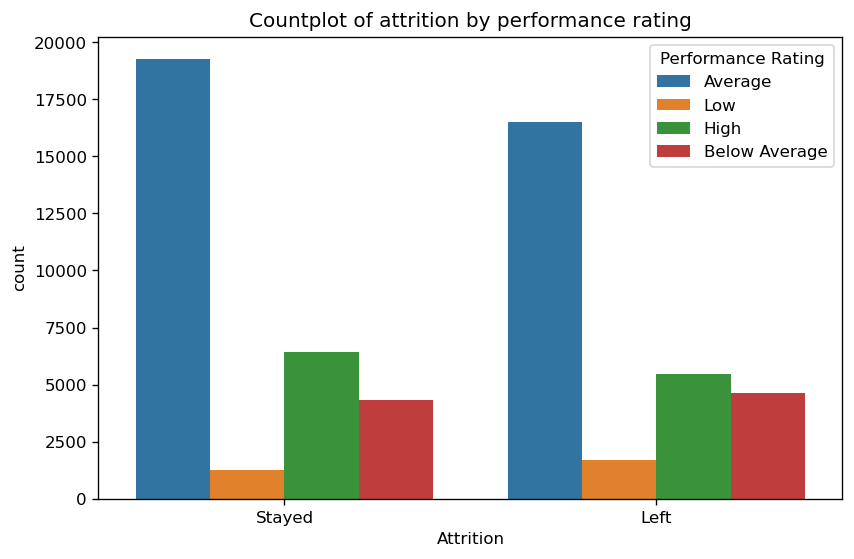

In [22]:
plt.figure(figsize=(8, 5), dpi=120)
plt.title("Countplot of attrition by performance rating")
sns.countplot(train_df, x='Attrition', hue='Performance Rating')
plt.show()

2.5.1
False


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [26]:
# Encode target
label_encoder = LabelEncoder()
train_df['Attrition'] = label_encoder.fit_transform(train_df['Attrition']) 

In [27]:
# Separate features and target
X = train_df.drop('Attrition', axis=1)
y = train_df['Attrition']

In [28]:
# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [29]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [34]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32).view(-1,1)

In [35]:
# Create Dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [36]:
# Define the model
class AttritionNet(nn.Module):
    def __init__(self, input_dim):
        super(AttritionNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.layer2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.layer3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

model = AttritionNet(X_train_tensor.shape[1])
crition = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
# Train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = crition(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.5244
Epoch 2/20, Loss: 0.5025
Epoch 3/20, Loss: 0.4969
Epoch 4/20, Loss: 0.4950
Epoch 5/20, Loss: 0.4958
Epoch 6/20, Loss: 0.4938
Epoch 7/20, Loss: 0.4920
Epoch 8/20, Loss: 0.4911
Epoch 9/20, Loss: 0.4905
Epoch 10/20, Loss: 0.4893
Epoch 11/20, Loss: 0.4858
Epoch 12/20, Loss: 0.4853
Epoch 13/20, Loss: 0.4852
Epoch 14/20, Loss: 0.4860
Epoch 15/20, Loss: 0.4849
Epoch 16/20, Loss: 0.4860
Epoch 17/20, Loss: 0.4829
Epoch 18/20, Loss: 0.4831
Epoch 19/20, Loss: 0.4828
Epoch 20/20, Loss: 0.4824


In [38]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_label = (y_pred > 0.5).float()

In [39]:
# Metrics
accuracy = accuracy_score(y_test_tensor,  y_pred_label)
precision = precision_score(y_test_tensor,  y_pred_label)
recall = recall_score(y_test_tensor, y_pred_label)
f1 = f1_score(y_test_tensor, y_pred_label)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Model Evaluation:
Accuracy: 0.7497
Precision: 0.7698
Recall: 0.7459
F1-Score: 0.7576


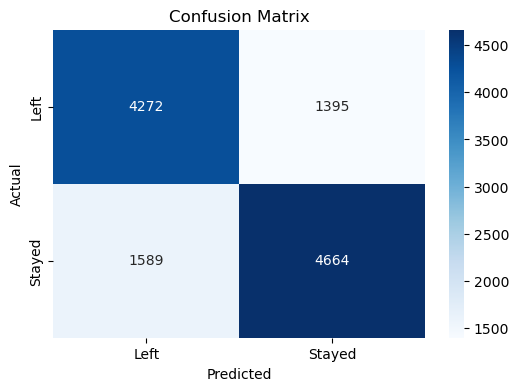

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test_tensor, y_pred_label)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Left', 'Stayed'], yticklabels=['Left', 'Stayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
